## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [665]:
import numpy as np
import matplotlib.pyplot as plt 
import math

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [666]:
a =-2
b =1 
x = np.linspace(0,20,50)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [667]:
y = a*x+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

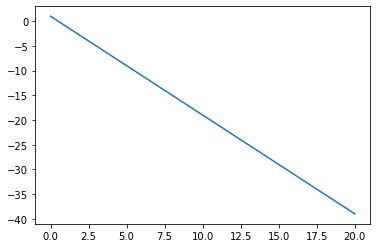

In [668]:
plt.plot(x,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [669]:


def GD(X,y,lr,iter):
    loss = []
    theta_0 = 0
    theta_1 = 0
    theta0_val = []
    theta1_val = []
    y_pred = []
    for i in range(iter):
        
        y_predict = theta_0+theta_1*X
        y_pred.append(y_predict)
        
        cost_fn = (1/(2*(len(X))))*np.sum((y_predict-y)**2)
        loss.append(cost_fn)
        
        grad_0 = (1/len(X))* np.sum((y_predict - y))
        grad_1 = (1/len(X))* np.sum((y_predict - y)*X)
        
        theta0_val.append(theta_0)
        theta1_val.append(theta_1)
        
        theta_0 = theta_0 - lr*grad_0 
        theta_1 = theta_1 - lr*grad_1
        
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1
        

#### Try your function with any input parameterss of your choice.

In [670]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = GD(x,y,0.001,100)

#### Calculate r2 score

In [671]:
from sklearn.metrics import r2_score
r2_score(y,y_pred[-1])

0.9976972946618887

#### Plot loss vs. epochs

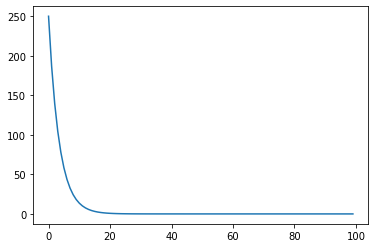

In [672]:
plt.plot(np.arange(100),loss)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

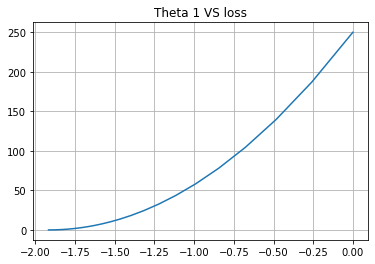

In [673]:
plt.grid()
plt.title('Theta 1 VS loss')
plt.plot(theta1_val,loss)

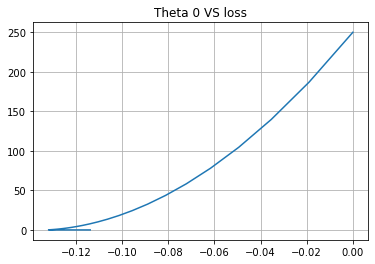

In [674]:
plt.grid()
plt.title('Theta 0 VS loss')
plt.plot(theta0_val,loss)

#### Plot all regression lines till converge

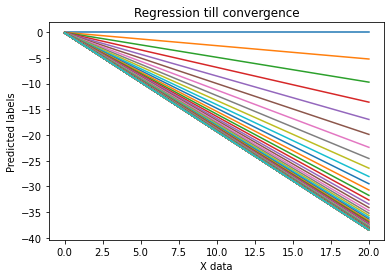

In [675]:
plt.title('Regression till convergence')
plt.ylabel('Predicted labels')
plt.xlabel('X data')
for i in range(100):
    plt.plot(x,y_pred[i])

#### Plot the best regression line

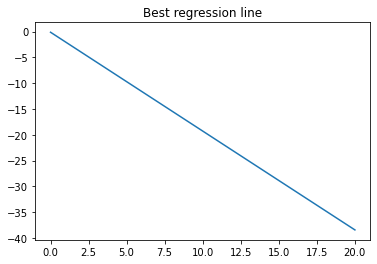

In [676]:
plt.title('Best regression line')
plt.plot(x,y_pred[-1])

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [677]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = GD(x,y,0.0001,50)

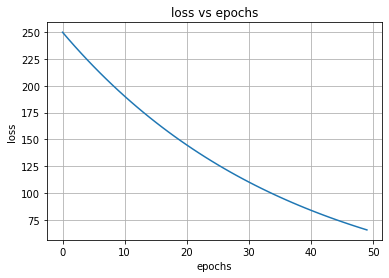

In [678]:
plt.grid()
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(np.arange(50),loss)

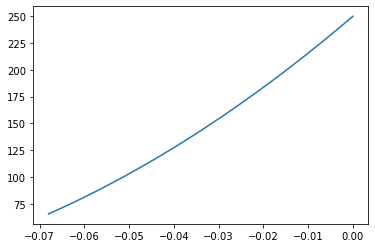

In [679]:
plt.plot(theta0_val,loss)

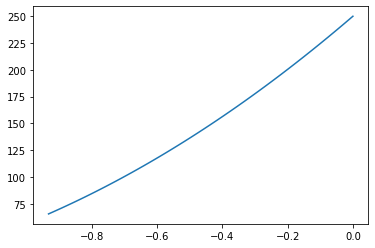

In [680]:
plt.plot(theta1_val,loss)

In [681]:
r2_score(y,y_pred[-1])

0.051790351437590254

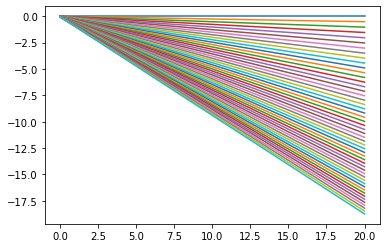

In [682]:
for i in range(50):
    plt.plot(x,y_pred[i])

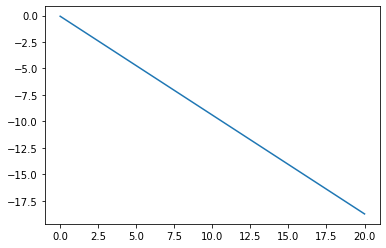

In [683]:
plt.plot(x,y_pred[-1])

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [684]:
from sklearn.utils import shuffle

def mini_batches(x,y,batch_size,shuffled= False):
    iter = len(x)//(batch_size)
    mini_batches = []
    x_new = x
    y_new = y
    if shuffled:
        x_new,y_new = shuffle(x, y, random_state=0)
       # print('hii')
    for epoch in range(0,iter):
        mini_batch_x = x[epoch*batch_size:(epoch+1)*batch_size]
        mini_batch_y = y[epoch*batch_size:(epoch+1)*batch_size]
        mini_batches.append((mini_batch_x,mini_batch_y))
        
    if len(x)%batch_size != 0: # in case not evenly divided
        mini_batch_x = x[(epoch+1)*batch_size:len(x)]
        mini_batch_y = y[(epoch+1)*batch_size:len(x)]
        mini_batches.append((mini_batch_x,mini_batch_y))
    return mini_batches
        

In [685]:
def mbgd(X,y,batch_size,lr,iter,shuffled= False):
    theta0_val=[]
    theta1_val=[]
    y_pred = []
    loss = []
    theta_0=theta_1 = 0
    for epoch in range(iter):
        for xs,ys in mini_batches(X,y,batch_size,shuffled):
            y_predict = theta_0+theta_1*xs
            y_pred.append(y_predict)
            
            grad_0 = (1/len(xs))* np.sum((y_predict - ys))
            grad_1 = (1/len(xs))* np.sum((y_predict - ys)*xs)
            
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            
            theta_0 = theta_0 - lr*grad_0 
            theta_1 = theta_1 - lr*grad_1
        
        cost_fn = (1/(2*(len(xs))))*np.sum((y_predict-ys)**2)
        loss.append(cost_fn)
            
            
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1

In [686]:
batch_size = 5
iter = 50
lr = 0.001
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = mbgd(x,y,batch_size,lr,iter,False)
len(loss)

50

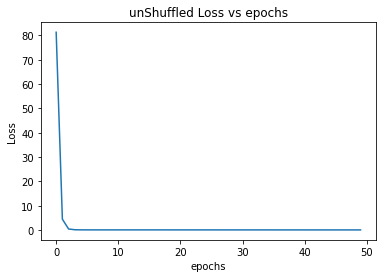

In [687]:
plt.title('unShuffled Loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.plot(np.arange(iter),loss)

0.9979506542441181

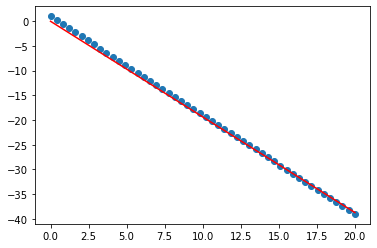

In [688]:
plt.scatter(x,y)
predictions = [theta_0+theta_1*i for i in x]
plt.plot(x,predictions,'r')
r2_score(y,predictions)

# Shuffled

In [689]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = mbgd(x,y,batch_size,lr,iter,True)
theta_1

-1.9351401134571087

0.9979506542441181

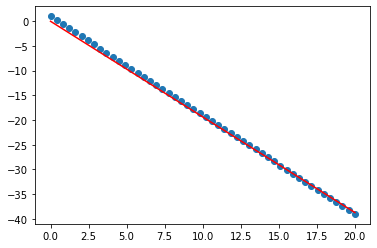

In [690]:
plt.scatter(x,y)
predictions = [theta_0+theta_1*i for i in x]
plt.plot(x,predictions,'r')
r2_score(y,predictions)

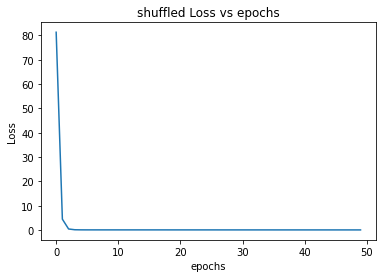

In [691]:
plt.title('shuffled Loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.plot(np.arange(iter),loss)

# Different batch size

In [692]:
batch_size = 32
iter = 50
lr = 0.001
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = mbgd(x,y,batch_size,lr,iter,False)

0.9976467868544702

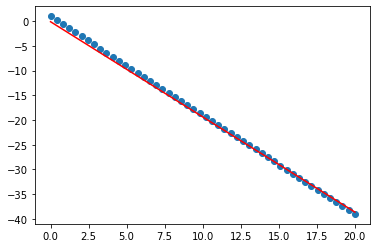

In [693]:
plt.scatter(x,y)
predictions = [theta_0+theta_1*i for i in x]
plt.plot(x,predictions,'r')
r2_score(y,predictions)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [792]:
def sgd(X,y,lr,epochs,shuffled):
    loss = []
    
    theta_0 = 0
    theta_1 = 0
    
    theta0_val = []
    theta1_val = []
    
    y_pred = []
    y_predict = 0
    
    x_new = X
    y_new = y
    
    
    for epoch in range(epochs):
        if shuffled:
            x_new,y_new = shuffle(x, y, random_state=0)
        for s in range(len(X)):
            
            y_predict = theta_0 + theta_1*x_new[s]
            
            grad_0 = (y_predict - y_new[s])
            grad_1 = (y_predict - y_new[s])*x_new[s]
            
            theta_0 -= lr*grad_0
            theta_1 -= lr*grad_1
            
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            
            
        y_pred.append(y_predict)    
        j = (1/2)*(y_predict - y[s])**2
        loss.append(j)
            
    return theta0_val,theta1_val,loss,y_pred,theta_0,theta_1


In [786]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = sgd(x,y,0.01,100,False)

In [787]:
predictions = [theta_0+theta_1*i for i in x]

In [788]:
r2_score(y,predictions)

0.9999999896583711

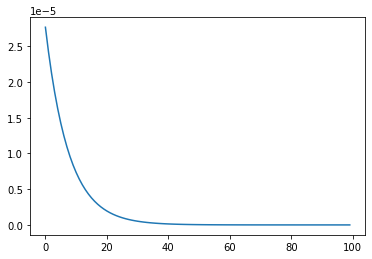

In [789]:
plt.plot(np.arange(0,100),loss)

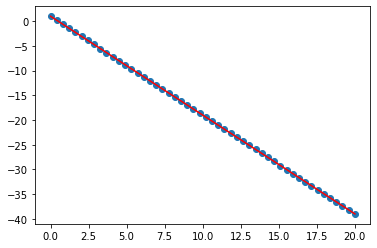

In [790]:
plt.scatter(x,y)
plt.plot(x,predictions,'r')

# Shuffled

In [793]:
theta0_val,theta1_val,loss,y_pred,theta_0,theta_1 = sgd(x,y,0.01,100,True)

In [795]:
predictions = [theta_0+theta_1*i for i in x]
r2_score(y,predictions)

0.9997003685304353

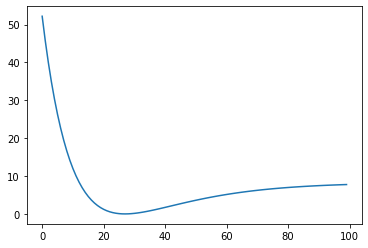

In [796]:
plt.plot(np.arange(0,100),loss)

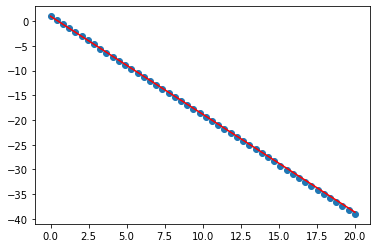

In [797]:
plt.scatter(x,y)
plt.plot(x,predictions,'r')